In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

# Part 1 - The Data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# a single image from X_train
img = X_train[0]
img.shape

(28, 28)

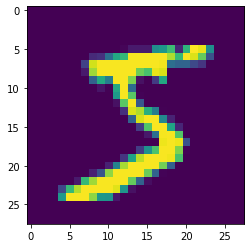

In [11]:
plt.imshow(img);

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train.shape

(60000,)

In [18]:
y_example = to_categorical(y_train)

In [20]:
y_example.shape

(60000, 10)

In [23]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [25]:
y_cat_train = to_categorical(y_train, 10)

In [26]:
X_train = X_train / 255
X_test = X_test / 255

In [27]:
# needs to be reshaped to add color dimention
X_train.shape

(60000, 28, 28)

In [30]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [31]:
X_train.shape

(60000, 28, 28, 1)

# Part 2 - Creating and Training the Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [35]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) # flattens the image to 1D

model.add(Dense(128, activation="relu")) # at least one after flatten

model.add(Dense(10, activation="softmax")) # softmax for multiple classes as results

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# MANDATORY FIXED PARAMETERS:
### 1. input_shape (based on image size in the data)
### 2. Flatten layer
### 3. final Dense layer with output = number of classes

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
stopper = EarlyStopping(monitor="val_loss", patience=1)

In [38]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[stopper])

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2801 - accuracy: 0.9157 - val_loss: 0.0620 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0440 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9913 - val_loss: 0.0447 - val_accuracy: 0.9845


# Part 3 - Model Evaluation

In [40]:
metrics = pd.DataFrame(model.history.history)

In [42]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139077,0.958383,0.061987,0.9787
1,0.047494,0.985250,0.044029,0.9853
2,0.030511,0.990400,0.044715,0.9845


<AxesSubplot:>

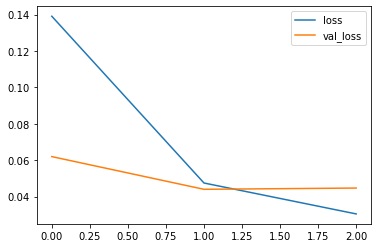

In [43]:
# plot loss to val_loss and acc to val_acc
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

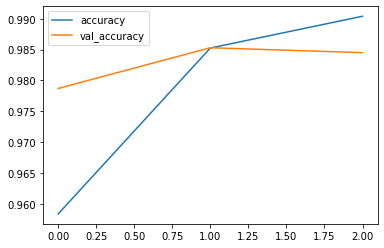

In [44]:
metrics[["accuracy", "val_accuracy"]].plot()

In [45]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0447 - accuracy: 0.9845


[0.044714950025081635, 0.984499990940094]

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
preds = model.predict_classes(X_test)

In [54]:
# to compare results, since we predict the classes, we use y_test which is the result of classes
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.96      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [55]:
confusion_matrix(y_test, preds)

array([[ 978,    0,    1,    1,    0,    0,    0,    0,    0,    0],
       [   0, 1125,    3,    1,    0,    0,    3,    2,    1,    0],
       [   4,    1, 1015,    0,    1,    0,    0,    6,    5,    0],
       [   0,    0,    4, 1002,    0,    1,    0,    2,    1,    0],
       [   0,    0,    0,    0,  973,    0,    5,    1,    0,    3],
       [   2,    0,    0,   21,    0,  854,    2,    0,   13,    0],
       [   7,    2,    0,    0,    2,    1,  944,    0,    2,    0],
       [   1,    0,    6,    0,    0,    0,    0, 1020,    1,    0],
       [   4,    1,    1,    1,    2,    0,    0,    2,  960,    3],
       [   2,    3,    0,    2,   13,    2,    0,    9,    4,  974]],
      dtype=int64)

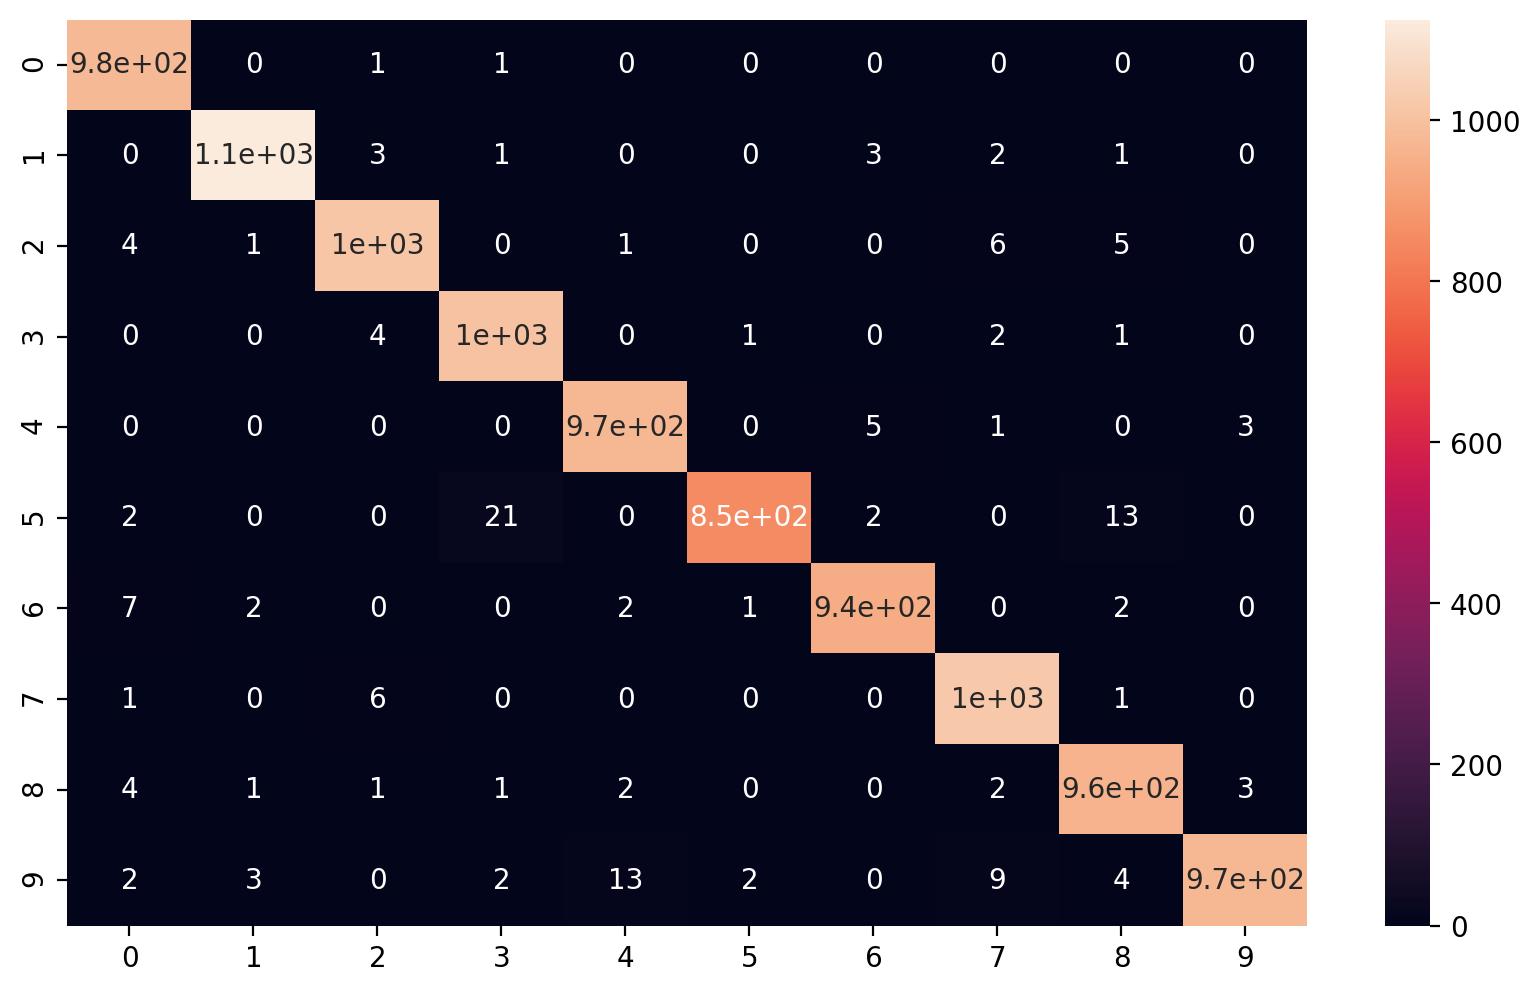

In [67]:
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(confusion_matrix(y_test, preds), annot=True);

### Predicting a new image

In [68]:
img = X_test[0]

In [73]:
img.shape

(28, 28, 1)

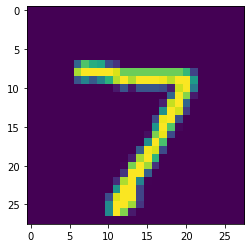

In [71]:
# doesn't work with third dimention = 1, needs reshape to remove it
plt.imshow(img.reshape(28, 28));

In [75]:
# needs n_images as first dimention, reshape necessary
model.predict_classes(img.reshape(1, 28, 28, 1))

array([7], dtype=int64)